Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from google.colab import drive
from sklearn.feature_selection import RFECV, RFE

warnings.filterwarnings('ignore')

Mounting google drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


loading the data into a data frame

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML_Project/data.csv')
#data = pd.read_csv('/content/drive/MyDrive/ML_Project/data.csv')
#print(data)

print the first 5 rows of the dataframe

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


print last 5 rows of the dataframe

In [5]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


##Clean and prepare the data
checking for null values

In [6]:
# checking for null values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

getting all the information about the data:

In [7]:
# getting all the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

getting the statistical measures of the data

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


separating the target variable and removing unneeded columns from the feature set to prepare data for machine learning tasks

In [9]:
y = df.diagnosis
x = df.drop(["id", 'diagnosis', 'Unnamed: 32'], axis=1)

In [10]:
print(x.shape)
x.head()

(569, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We use histplot() to visualize the distribution of diagnoses between malignant and benign categories

Number of Benign (B):  357
Number of Malignant (M):  212 



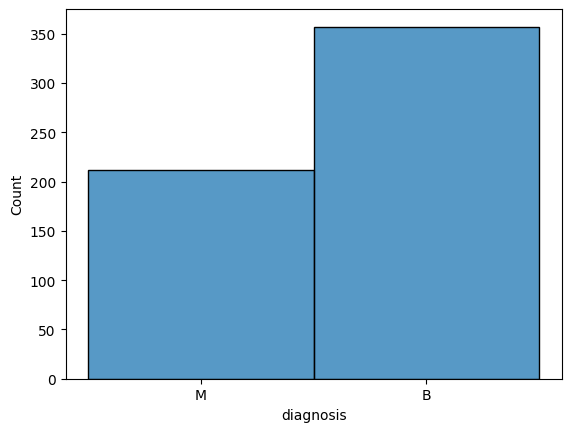

In [11]:
sns.histplot(y, label="count")
B, M = y.value_counts()
print('Number of Benign (B): ',B)
print('Number of Malignant (M): ',M, "\n")


and to transform diagnosis into numeric values we call the function LabelEncoder()

In [12]:
labelEncoder = LabelEncoder()
y = pd.DataFrame(data=labelEncoder.fit_transform(y).reshape(-1,1), columns=['diagnosis'])
display(y)

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


<Axes: ylabel='Count'>

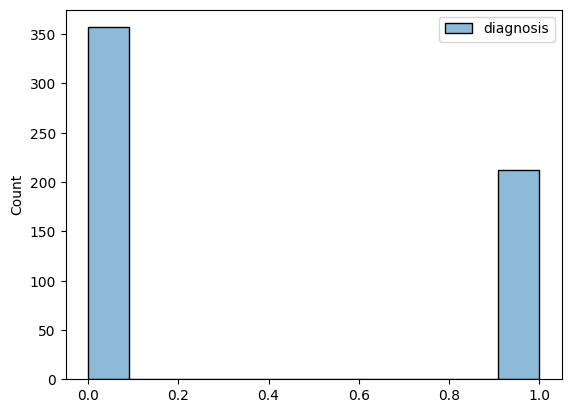

In [13]:
sns.histplot(y, label="count")

we will do swarmplot() in three parts to not make plot very complex appearance ,so here is the first part

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

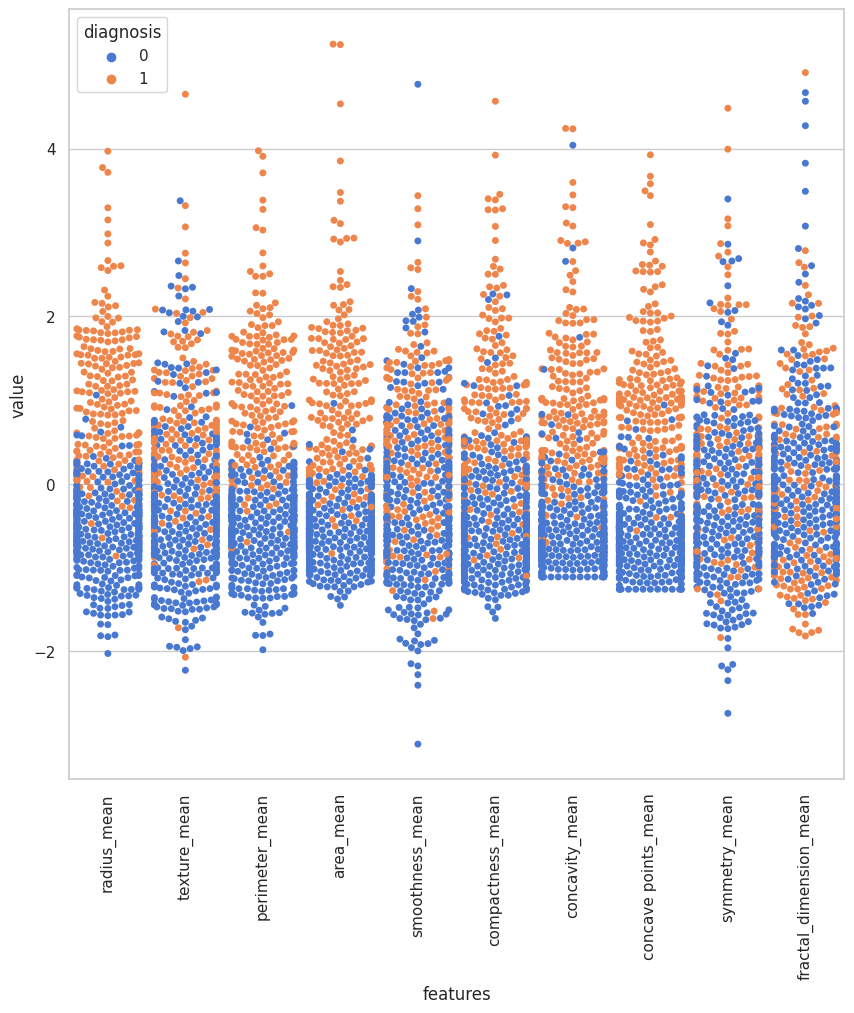

In [14]:
sns.set(style="whitegrid", palette="muted")
data = x
data_n_2 = (data - data.mean()) / (data.std())      # x data standardization
#y = pd.DataFrame(y)
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)


the second part:

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

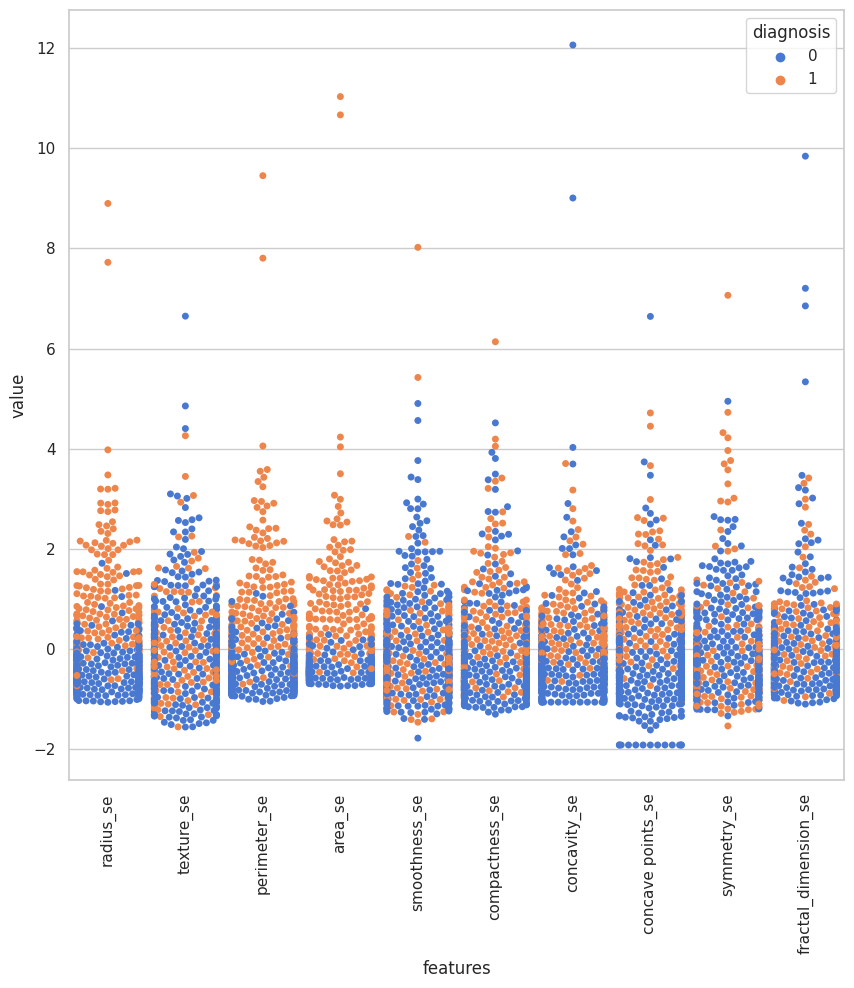

In [15]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)


and the third part:

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

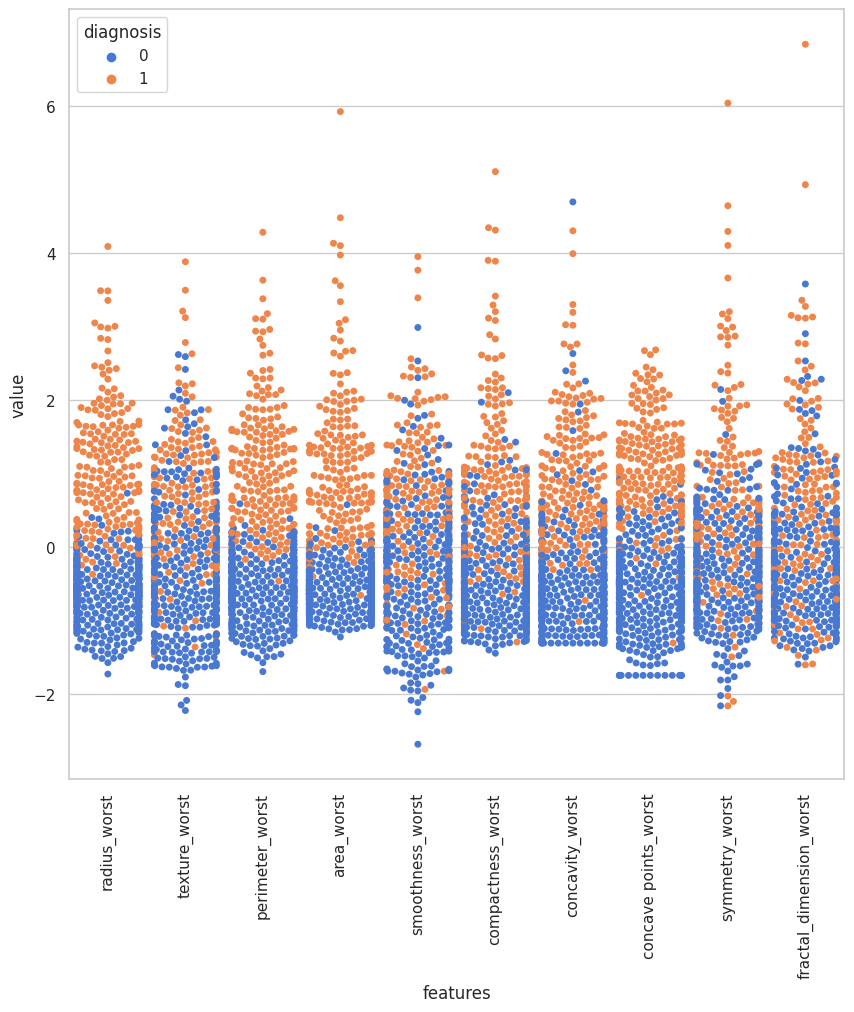

In [16]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)


calculate the correlation matrix for the features

In [17]:
x.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


and visualise it into a heatmap

<Axes: >

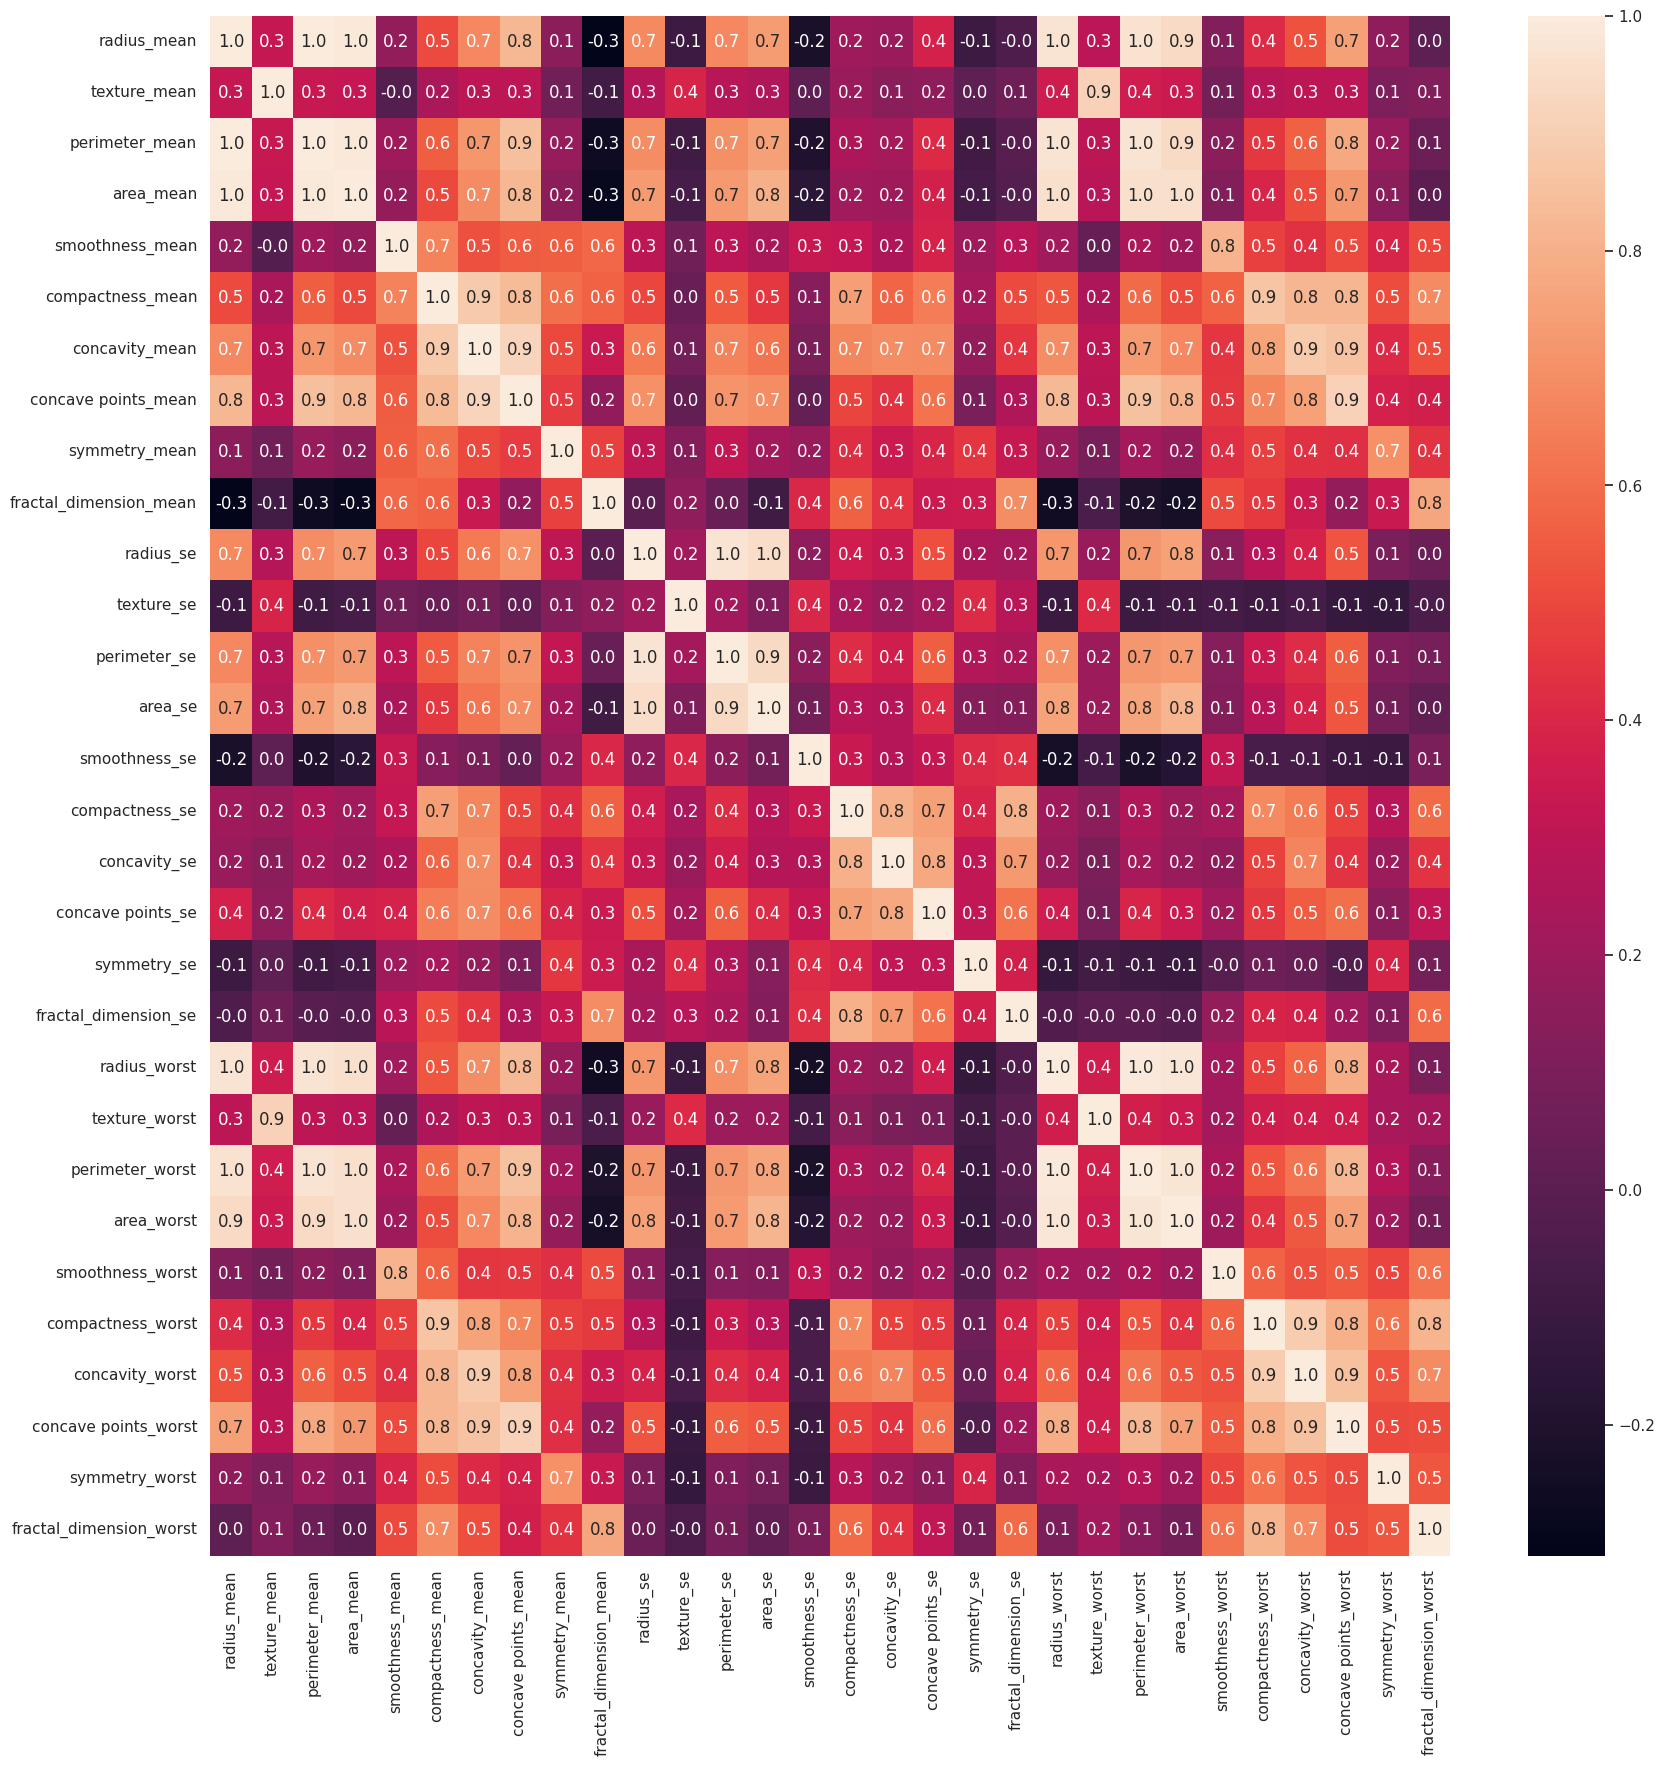

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(x.corr(), annot=True, fmt= '.1f')

we notice that Compactness_mean, concavity_mean and concave points_mean are correlated with each other so we only choose concavity_mean. and radius_se, perimeter_se and area_se are correlated so we only use area_se. also radius_worst, perimeter_worst and area_worst are correlated so we use area_worst. also Compactness_worst, concavity_worst and concave points_worst so we use concavity_worst Compactness_se, concavity_se and concave points_se so we use concavity_se. texture_mean and texture_worst are correlated and we use texture_mean. area_worst and area_mean are correlated, we use area_mean.

we exclude correlated features

In [19]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
new_x = x.drop(drop_list, axis = 1)
new_x.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


and hear is the features after dropping this features

<Axes: >

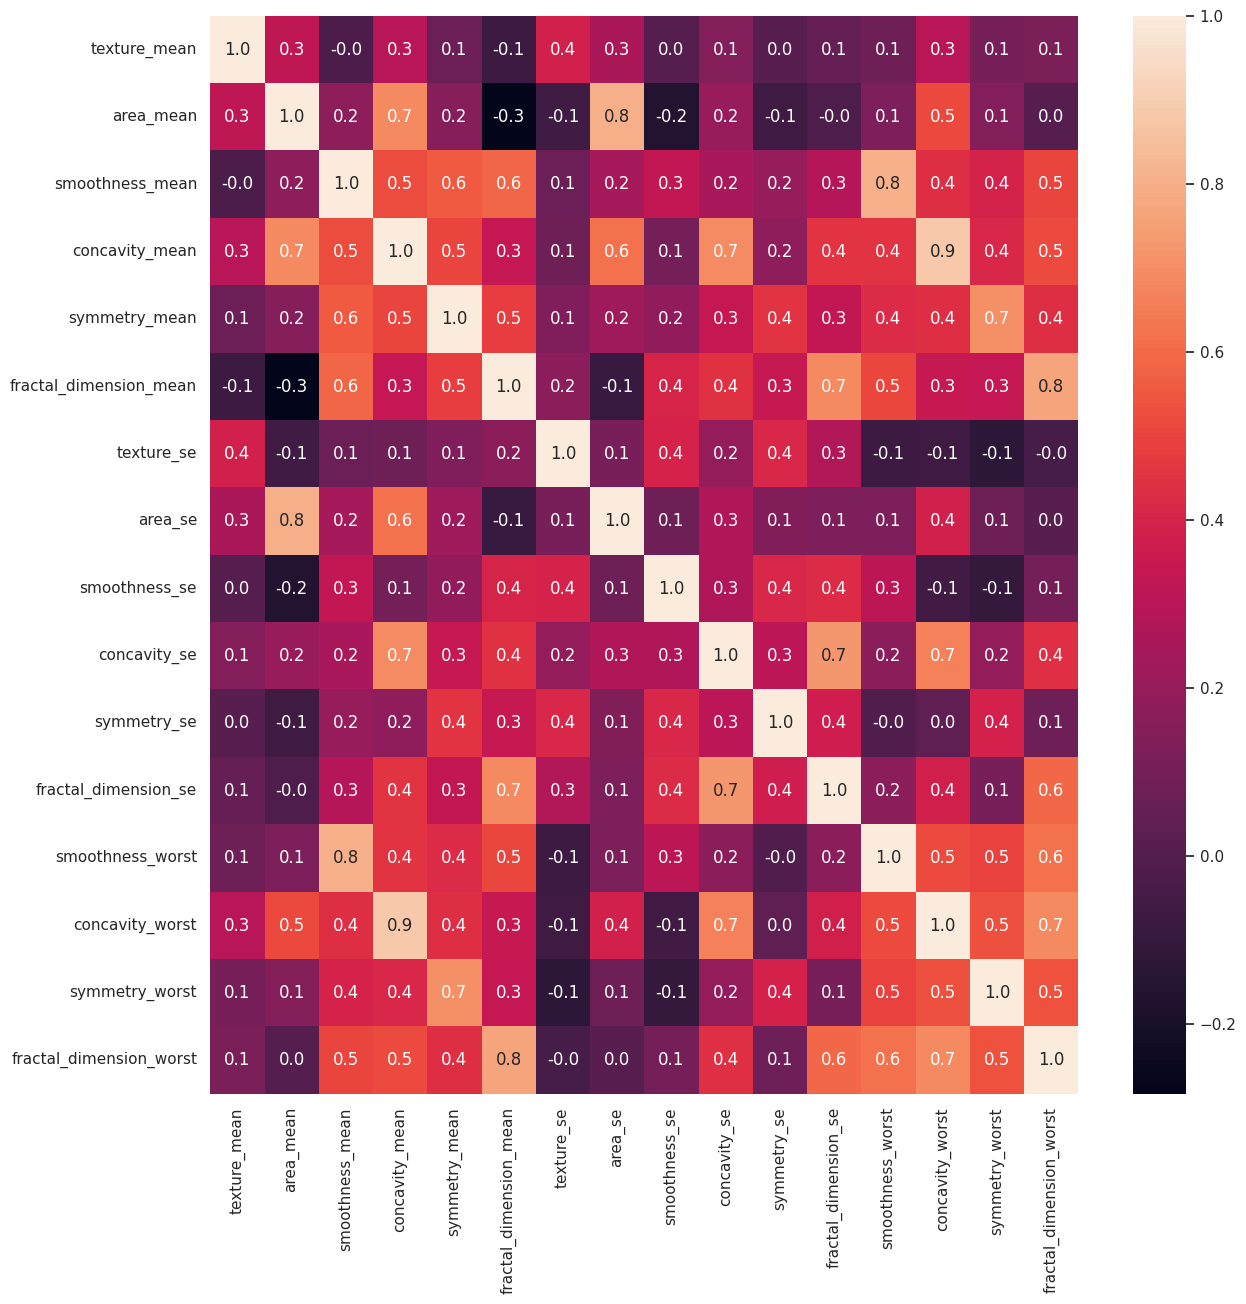

In [20]:
plt.figure(figsize=(14,14))
sns.heatmap(new_x.corr(), annot=True, fmt= '.1f')

Separating data and labels

split the dataset into training and testing sets to assess the model's performance on unseen data

In [21]:
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.2, random_state=0)

Recursive feature elimination with cross validation and random forest classification(RFECV)
We use it to find how many features do we need for best accuracy.

In [22]:
rf = RandomForestClassifier()
rfecv = RFECV(estimator=rf, cv=5, scoring='accuracy')
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 14
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'area_se', 'concavity_se',
       'symmetry_se', 'fractal_dimension_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


 Recursive feature elimination (RFE) with random forest

it uses one of the classification methods (random forest in our example), assign weights to each of features. Whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features

In [23]:
rf2 = RandomForestClassifier()
rfe = RFE(estimator=rf2, n_features_to_select=6, step=1)
rfe = rfe.fit(x_train, y_train)
print('Chosen best 6 feature by rfe:',x_train.columns[rfe.support_])


Chosen best 6 feature by rfe: Index(['area_mean', 'concavity_mean', 'area_se', 'concavity_se',
       'smoothness_worst', 'concavity_worst'],
      dtype='object')


In [24]:
x_train2 = rfe.transform(x_train)
x_test2 = rfe.transform(x_test)

Data standardization

In [25]:
standScal = StandardScaler()

In [26]:
s = x_train2
ss = x_test2
x_train2 = standScal.fit_transform(s)
x_test2 = standScal.fit_transform(ss)
display(x_train2)
display(x_train.shape)
display(y_train)
display(y_train.shape)

array([[-0.95876358, -0.80259612, -0.49154005, -0.46900701,  0.34249851,
        -0.81232053],
       [-0.82152548, -0.66066905, -0.42127695, -0.05029632, -0.09553745,
        -0.37504806],
       [ 0.40858627, -0.41799048, -0.38708923, -0.42362791, -0.52472419,
        -0.18298917],
       ...,
       [-1.04876494, -0.77699006, -0.20566361, -0.25723788,  0.03720072,
        -0.76769066],
       [-1.02221174, -1.12569574, -0.3900256 , -1.0129125 , -2.71180676,
        -1.34136004],
       [-0.69966029,  0.30515561, -0.48902316,  0.83379149, -0.11766047,
         0.47893704]])

(455, 16)

,diagnosis
338,0
427,0
406,0
96,0
490,0
...,...
277,1
9,1
359,0
192,0


(455, 1)

Training the model

In [27]:
logistic = LogisticRegression()
logistic.fit(x_train2, y_train)

LogisticRegression()

Evaluating the model

In [28]:
# accuracy score of the training data
x_train_prediction = logistic.predict(x_train2)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [29]:
print('Accuracy score of the training data : ', f"{round(training_data_accuracy*100,2)}%")

Accuracy score of the training data :  96.04%


In [30]:
#display(logistic.score(x_train, y_train))
#display(linear.score(x_train, y_train))

In [31]:
# accuracy score on the test data
logistic_prediction = logistic.predict(x_test2)
test_data_accuracy = accuracy_score(logistic_prediction, y_test)

In [32]:
print('Accuracy score of the test data : ', f"{round(test_data_accuracy*100,2)}%" )

Accuracy score of the test data :  93.86%


In [33]:
rfc = RandomForestClassifier()

In [34]:
rfc.fit(x_train2, y_train)

RandomForestClassifier()

In [35]:
x_rfc_prediction = rfc.predict(x_train2)
train_rfc_accuracy = accuracy_score(x_rfc_prediction, y_train)

In [36]:
print('Accuracy score of the training data : ', f"{round(train_rfc_accuracy*100,2)}%")

Accuracy score of the training data :  100.0%


In [37]:
x_rfc_test_prediction = rfc.predict(x_test2)
test_rfc_accuracy = accuracy_score(x_rfc_test_prediction, y_test)

In [38]:
print('Accuracy score of the test data : ', f"{round(test_rfc_accuracy*100,2)}%")

Accuracy score of the test data :  94.74%


In [39]:
nb = GaussianNB()
nb = nb.fit(x_train2, y_train)

train_nb_accuracy = accuracy_score(x_rfc_prediction, y_train)
print('Accuracy score of the training data : ', f"{round(train_nb_accuracy*100,2)}%")
predicted = nb.predict(x_test2)

acc_test = accuracy_score(y_test, predicted)

print(f'The accuracy on test data is {round(acc_test*100, 2)}%')


Accuracy score of the training data :  100.0%
The accuracy on test data is 92.98%


In [40]:
#logistic_prediction = logistic.predict(x_test)
#linear_prediction = linear.predict(x_test)
#logistic_accuracy = accuracy_score(y_test, logistic_prediction)
#linear_accuracy = accuracy_score(y_test, linear_prediction)
#print(logistic_accuracy)
#print(linear_accuracy)

In [41]:
#linear = LinearRegression()
#linear.fit(x_train, y_train)

In [42]:
print(classification_report(y_test, logistic_prediction, target_names=["Benign ", "Malignant"]))

              precision    recall  f1-score   support

     Benign        0.92      0.99      0.95        67
   Malignant       0.98      0.87      0.92        47

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



Predictive Model


In [43]:
input_data = ([10.38,1001,0.3001,153.4, 0.1622, 0.7119])

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = standScal.transform(input_data_reshaped)
print(std_data)

prediction = logistic.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('Benign')
else:
  print('Malignant')

[[-1.99138868e+00  1.15388652e+04 -1.14373155e+00  5.86765795e+03
   1.27752555e+00  1.75255680e+00]]
[1]
Malignant
